<a href="https://colab.research.google.com/github/ashrafyahya/jupyter/blob/main/notebooks/train-yolov8-object-classification-on-custom-dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Roboflow Notebooks](https://ik.imagekit.io/roboflow/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLOv8 Object Detection on a Custom Dataset

---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/wuZtUMEiKWY)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## Accompanying Blog Post

We recommend that you follow along in this notebook while reading the blog post on how to train YOLOv8 Object Detection, concurrently.

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv8
- CLI Basics
- Inference with Pre-trained COCO Model
- Roboflow Universe
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [31]:
!nvidia-smi

Fri Apr  4 08:37:07 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [32]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [34]:
# Pip install (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 920, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.11/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are frozenset({'predict', 'track', 'train', 'benchmark', 'val', 'export'}).

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of frozenset({'pose', 'obb', 'detect', 'classify', 'segment'})
                MODE (required) is one of frozenset({'predict', 'track', 'train', 'benchmark', 'val', 'export'})
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' tha

In [35]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml    epochs=1 ...
            ...           ...           ...
          segment        predict        yolov8n-seg.pt
          classify        val           yolov8n-cls.pt
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [36]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg'

/content
Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 71.2ms
Speed: 6.0ms preprocess, 71.2ms inference, 283.7ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [38]:
%cd {HOME}
Image(filename='runs/detect/predict4/dog.jpeg', height=600)

/content


FileNotFoundError: [Errno 2] No such file or directory: 'runs/detect/predict4/dog.jpeg'

### 🐍 Python SDK

In [75]:
!rm -rf cup_detect-1

In [76]:
 %cd {HOME}

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="1PLmz0tzmxtuSRLdM6cy")
project = rf.workspace("geethaka").project("office-space")
version = project.version(2)
dataset = version.download("yolov8")



/content
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Office-Space-2 in yolov8:: 100%|██████████| 778/778 [00:00<00:00, 7422.69it/s]


In [42]:
%cd {HOME}

/content


In [79]:
 #from ultralytics import YOLO

    # Load a model
   # model = YOLO("yolov8n-cls.yaml")  # build a new model from scratch
   # model = YOLO("yolov8n-cls.pt")  # load a pretrained model (recommended for training)

    # Train the model
   # results = model.train(data="", epochs=100, imgsz=64)

# Load YOLOv8n-cls, train it on imagenette160 for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # load a pretrained YOLOv8n classification model
model.train(data='/content/Office-Space-2/data.yaml', epochs=3)  # train the model
model('/content/Office-Space-2/test/images/scene00053_png.rf.1ec25bed555f216be44edd7fcc4a6f4b.jpg')  # predict on an image

Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Office-Space-2/data.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sh

train: Scanning /content/Office-Space-2/train/labels.cache... 335 images, 0 backgrounds, 0 corrupt: 100%|██████████| 335/335 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 15, len(boxes) = 2011. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/Office-Space-2/valid/labels.cache... 32 images, 0 backgrounds, 0 corrupt: 100%|██████████| 32/32 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      2.29G      1.063       3.74      1.252        198        640: 100%|██████████| 21/21 [00:07<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         32        193     0.0326       0.79      0.263      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3      2.76G     0.9522       2.96      1.191        151        640: 100%|██████████| 21/21 [00:06<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all         32        193      0.988      0.115      0.433      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3      2.76G     0.9343      2.274      1.201        144        640: 100%|██████████| 21/21 [00:06<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

                   all         32        193      0.967      0.306      0.598      0.481



3 epochs completed in 0.008 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,008,183 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]


                   all         32        193      0.966      0.306      0.599      0.481
               Dustbin          5          5          1          0      0.289      0.249
                   bag         24         56      0.894      0.446      0.807      0.616
                bottle         24         24          1      0.236      0.819      0.589
                  case          9          9          1          0      0.487      0.353
                 chair          3          3          1      0.917      0.995      0.671
               charger         22         22          1          0      0.941      0.771
                   cup          1          2          1          0     0.0111    0.00557
                  hand          2          2          1          0     0.0369      0.027
                laptop         12         13      0.773      0.846      0.874      0.828
                locker          8          8      0.944       0.75      0.786      0.722
                   mu

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Dustbin', 1: 'bag', 2: 'bottle', 3: 'case', 4: 'chair', 5: 'charger', 6: 'cup', 7: 'hand', 8: 'laptop', 9: 'locker', 10: 'mug', 11: 'plant', 12: 'tag'}
 obb: None
 orig_img: array([[[136, 149, 147],
         [137, 150, 148],
         [138, 151, 149],
         ...,
         [222, 228, 227],
         [222, 228, 227],
         [222, 228, 227]],
 
        [[136, 149, 147],
         [136, 149, 147],
         [137, 150, 148],
         ...,
         [222, 228, 227],
         [222, 228, 227],
         [222, 228, 227]],
 
        [[135, 148, 146],
         [135, 148, 146],
         [137, 150, 148],
         ...,
         [222, 228, 227],
         [222, 228, 227],
         [222, 228, 227]],
 
        ...,
 
        [[132, 151, 158],
         [131, 153, 159],
         [134, 153, 160],
         ...,
         [ 16,  14,  13],
         [ 16,  14,  1

In [81]:
!yolo task=detect mode=train model=yolov8n.pt data='/content/Office-Space-2/data.yaml' epochs=25

Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Office-Space-2/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

In [84]:
!yolo task=classify mode=val model=/content/runs/classify/train5/weights/best.pt data='/content/Office-Space-2/data.yaml'

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 958, in entrypoint
    model = YOLO(model, task=task)
            ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/models/yolo/model.py", line 37, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 148, in __init__
    self._load(model, task=task)
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 290, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
                            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py", line 1301, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
    

In [ ]:
!yolo task=classify mode=predict model='/content/runs/classify/train7/weights/best.pt' conf=0.25 source='/content/Cow-Identification-1/test/cattle_2700/cattle_2700_DSCF1273_jpg.rf.18e7015665545779572565fd6002ce77.jpg'

Ultralytics YOLOv8.0.5 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
YOLOv8n-cls summary: 73 layers, 1775626 parameters, 0 gradients, 3.6 GFLOPs
image 1/1 /content/Cow-Identification-1/test/cattle_2700/cattle_2700_DSCF1273_jpg.rf.18e7015665545779572565fd6002ce77.jpg: 224x224 cattle_2700 0.05, cattle_5519 0.05, cattle_4422 0.04, cattle_5971 0.04, cattle_6066 0.04, 5.7ms
Speed: 0.3ms pre-process, 5.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/classify/predict3


In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.pt")  # load an official model
model = YOLO("/content/runs/classify/train2/weights/best.pt")  # load a custom model

# Validate the model
results = model.val()  # no arguments needed, dataset and settings remembered

Ultralytics YOLOv8.0.5 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
YOLOv8n-cls summary: 73 layers, 1775626 parameters, 0 gradients, 3.6 GFLOPs
albumentations: RandomResizedCrop(p=1.0, height=224, width=224, scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=1), HorizontalFlip(p=0.5), ColorJitter(p=0.5, brightness=[0.6, 1.4], contrast=[0.6, 1.4], saturation=[0.6, 1.4], hue=[0, 0]), Normalize(p=1.0, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0), ToTensorV2(always_apply=True, p=1.0, transpose_mask=False)
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:01<00:00, 10.66it/s]
                   all    0.00797      0.012
Speed: 0.1ms pre-process, 0.9ms inference, 0.0ms loss, 0.0ms post-process per image


In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.pt")  # load an official model
model = YOLO("/content/runs/classify/train2/weights/best.pt")  # load a custom model

# Predict with the model
results = model("/content/Cow-Identification-1/test/cattle_2700/cattle_2700_DSCF1273_jpg.rf.18e7015665545779572565fd6002ce77.jpg")  # predict on an image



Ultralytics YOLOv8.0.5 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
YOLOv8n-cls summary: 73 layers, 1775626 parameters, 0 gradients, 3.6 GFLOPs
image 1/1 /content/Cow-Identification-1/test/cattle_2700/cattle_2700_DSCF1273_jpg.rf.18e7015665545779572565fd6002ce77.jpg: 224x224 cattle_2700 0.05, cattle_5519 0.05, cattle_4422 0.04, cattle_5971 0.04, cattle_6066 0.04, 4.9ms
Speed: 0.3ms pre-process, 4.9ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)


## Custom Training

In [86]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=25


/content
Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Office-Space-2/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con

In [87]:
!ls {HOME}/runs/detect/train7/

args.yaml					     P_curve.png       train_batch2.jpg
confusion_matrix_normalized.png			     PR_curve.png      train_batch315.jpg
confusion_matrix.png				     R_curve.png       train_batch316.jpg
events.out.tfevents.1743759669.69b7918d5c14.29349.0  results.csv       train_batch317.jpg
F1_curve.png					     results.png       val_batch0_labels.jpg
labels_correlogram.jpg				     train_batch0.jpg  val_batch0_pred.jpg
labels.jpg					     train_batch1.jpg  weights


/content


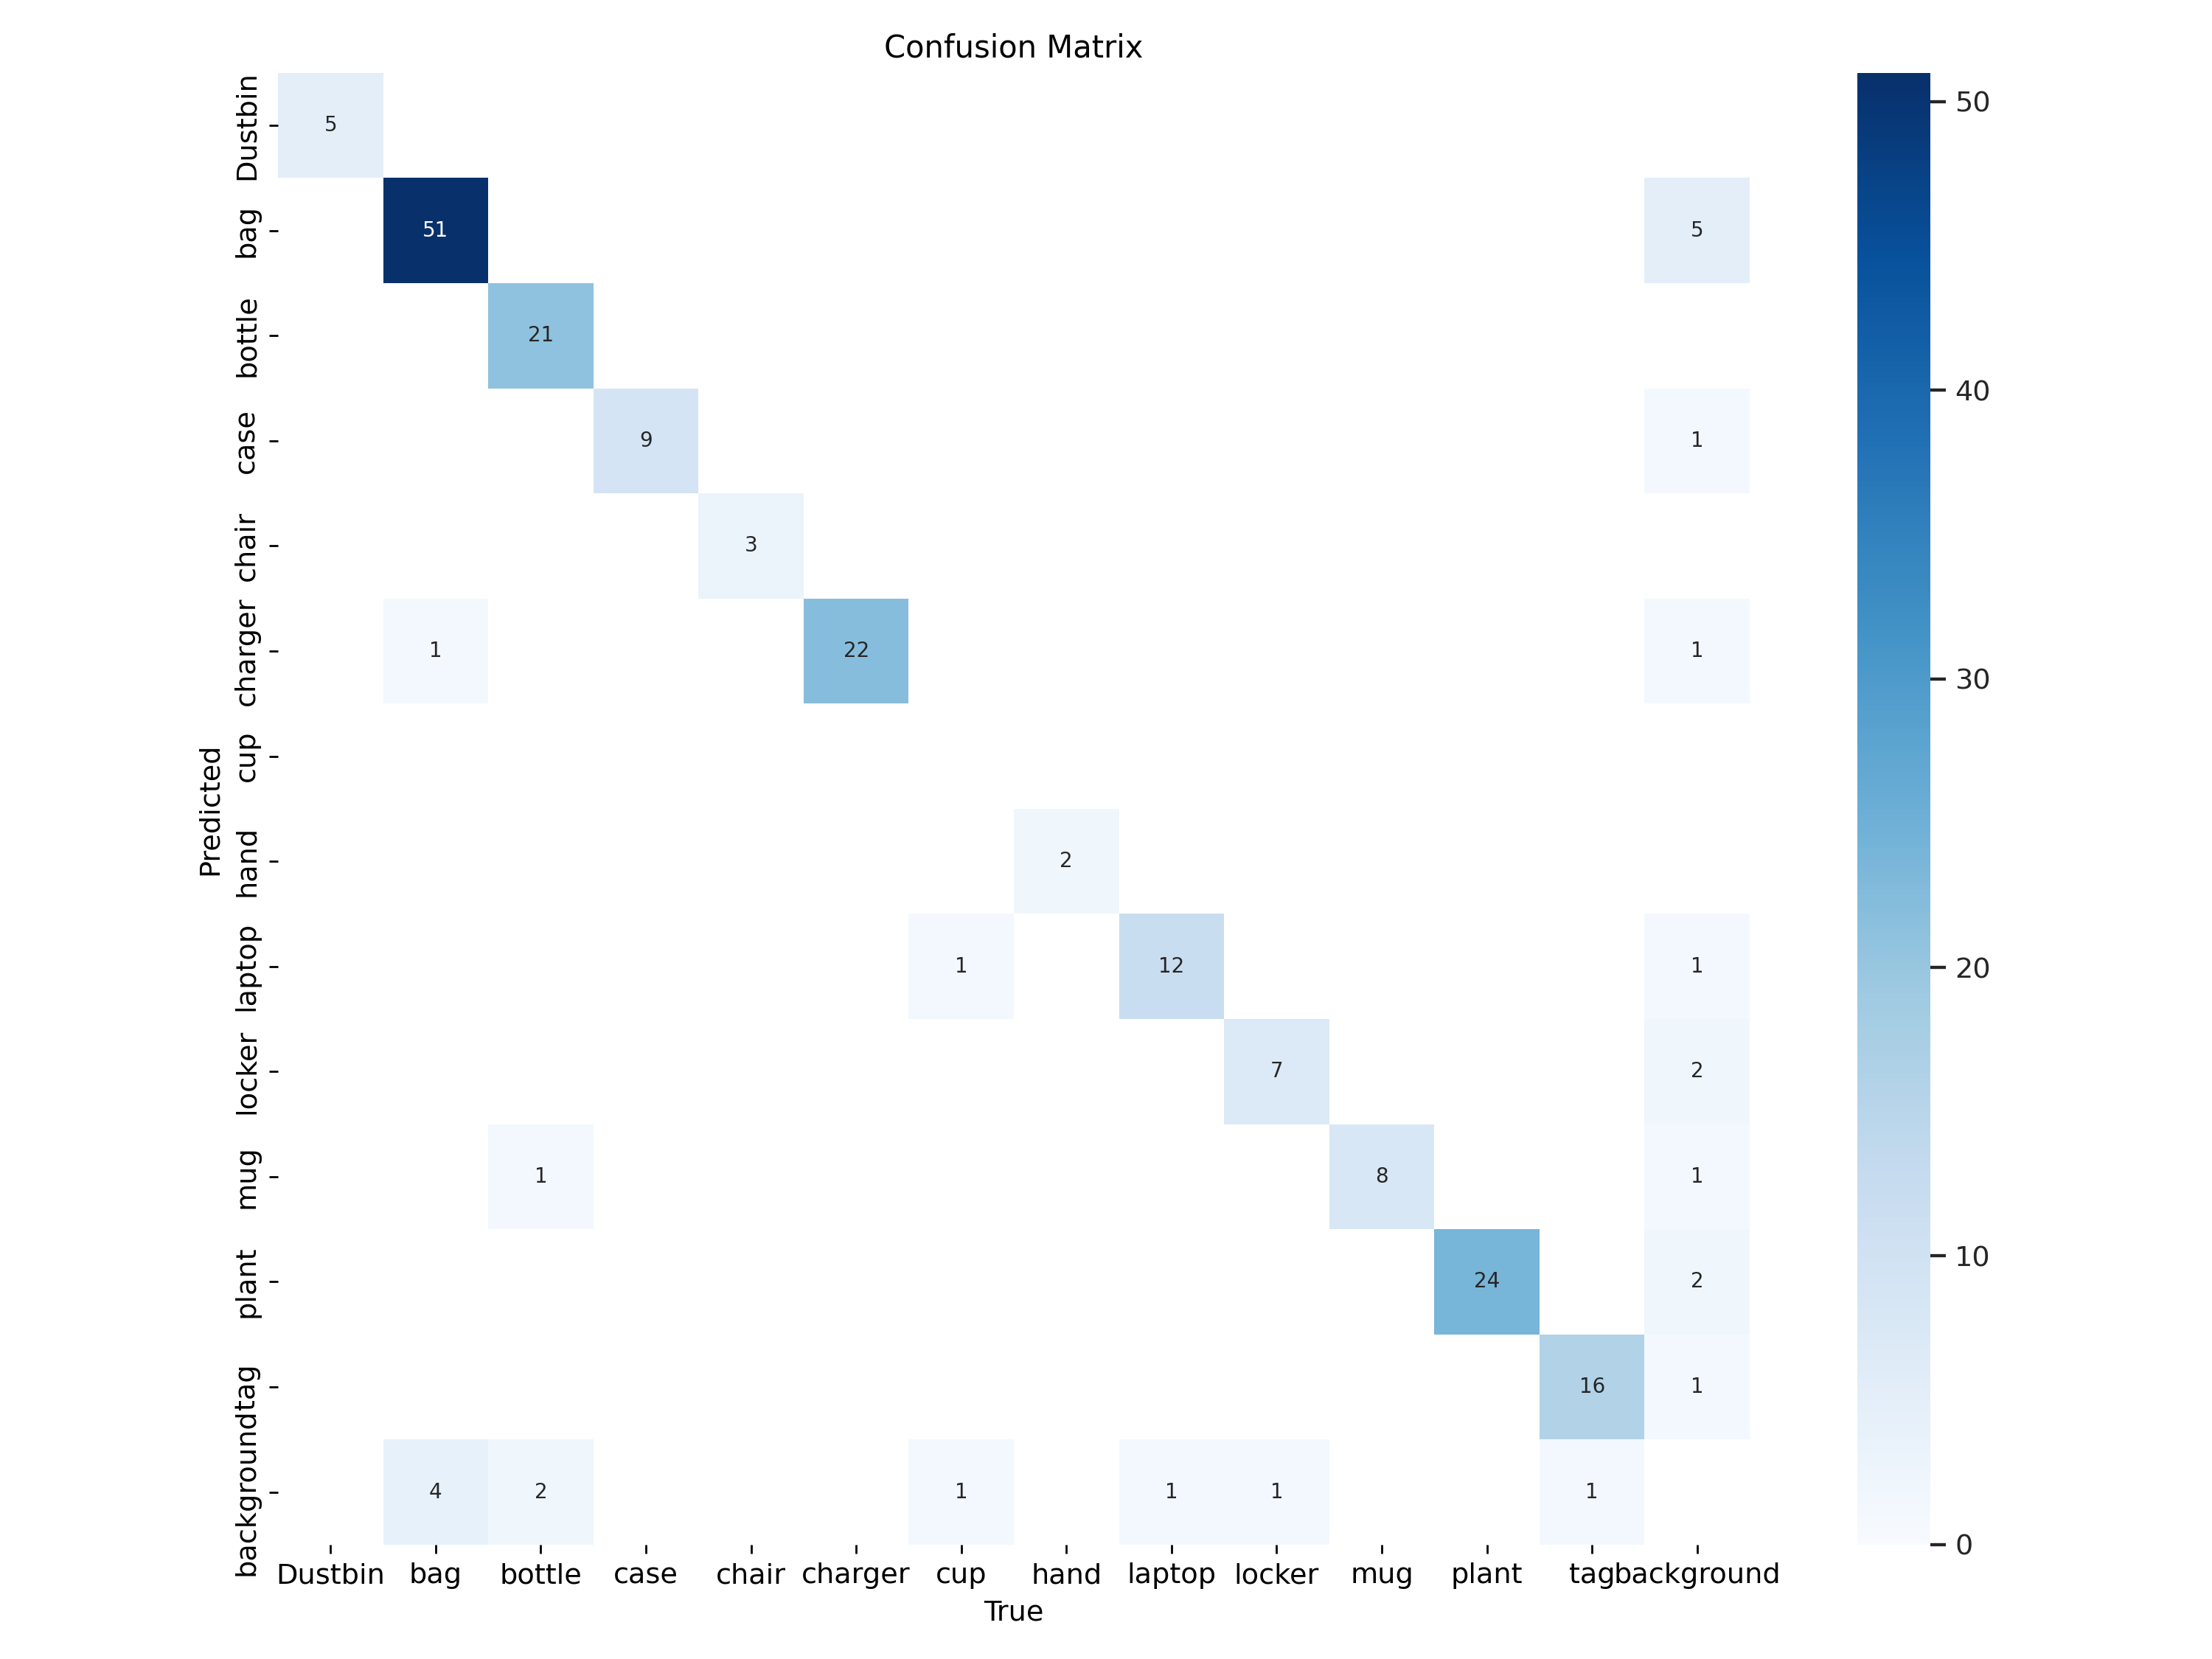

In [88]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train7/confusion_matrix.png', width=600)

/content


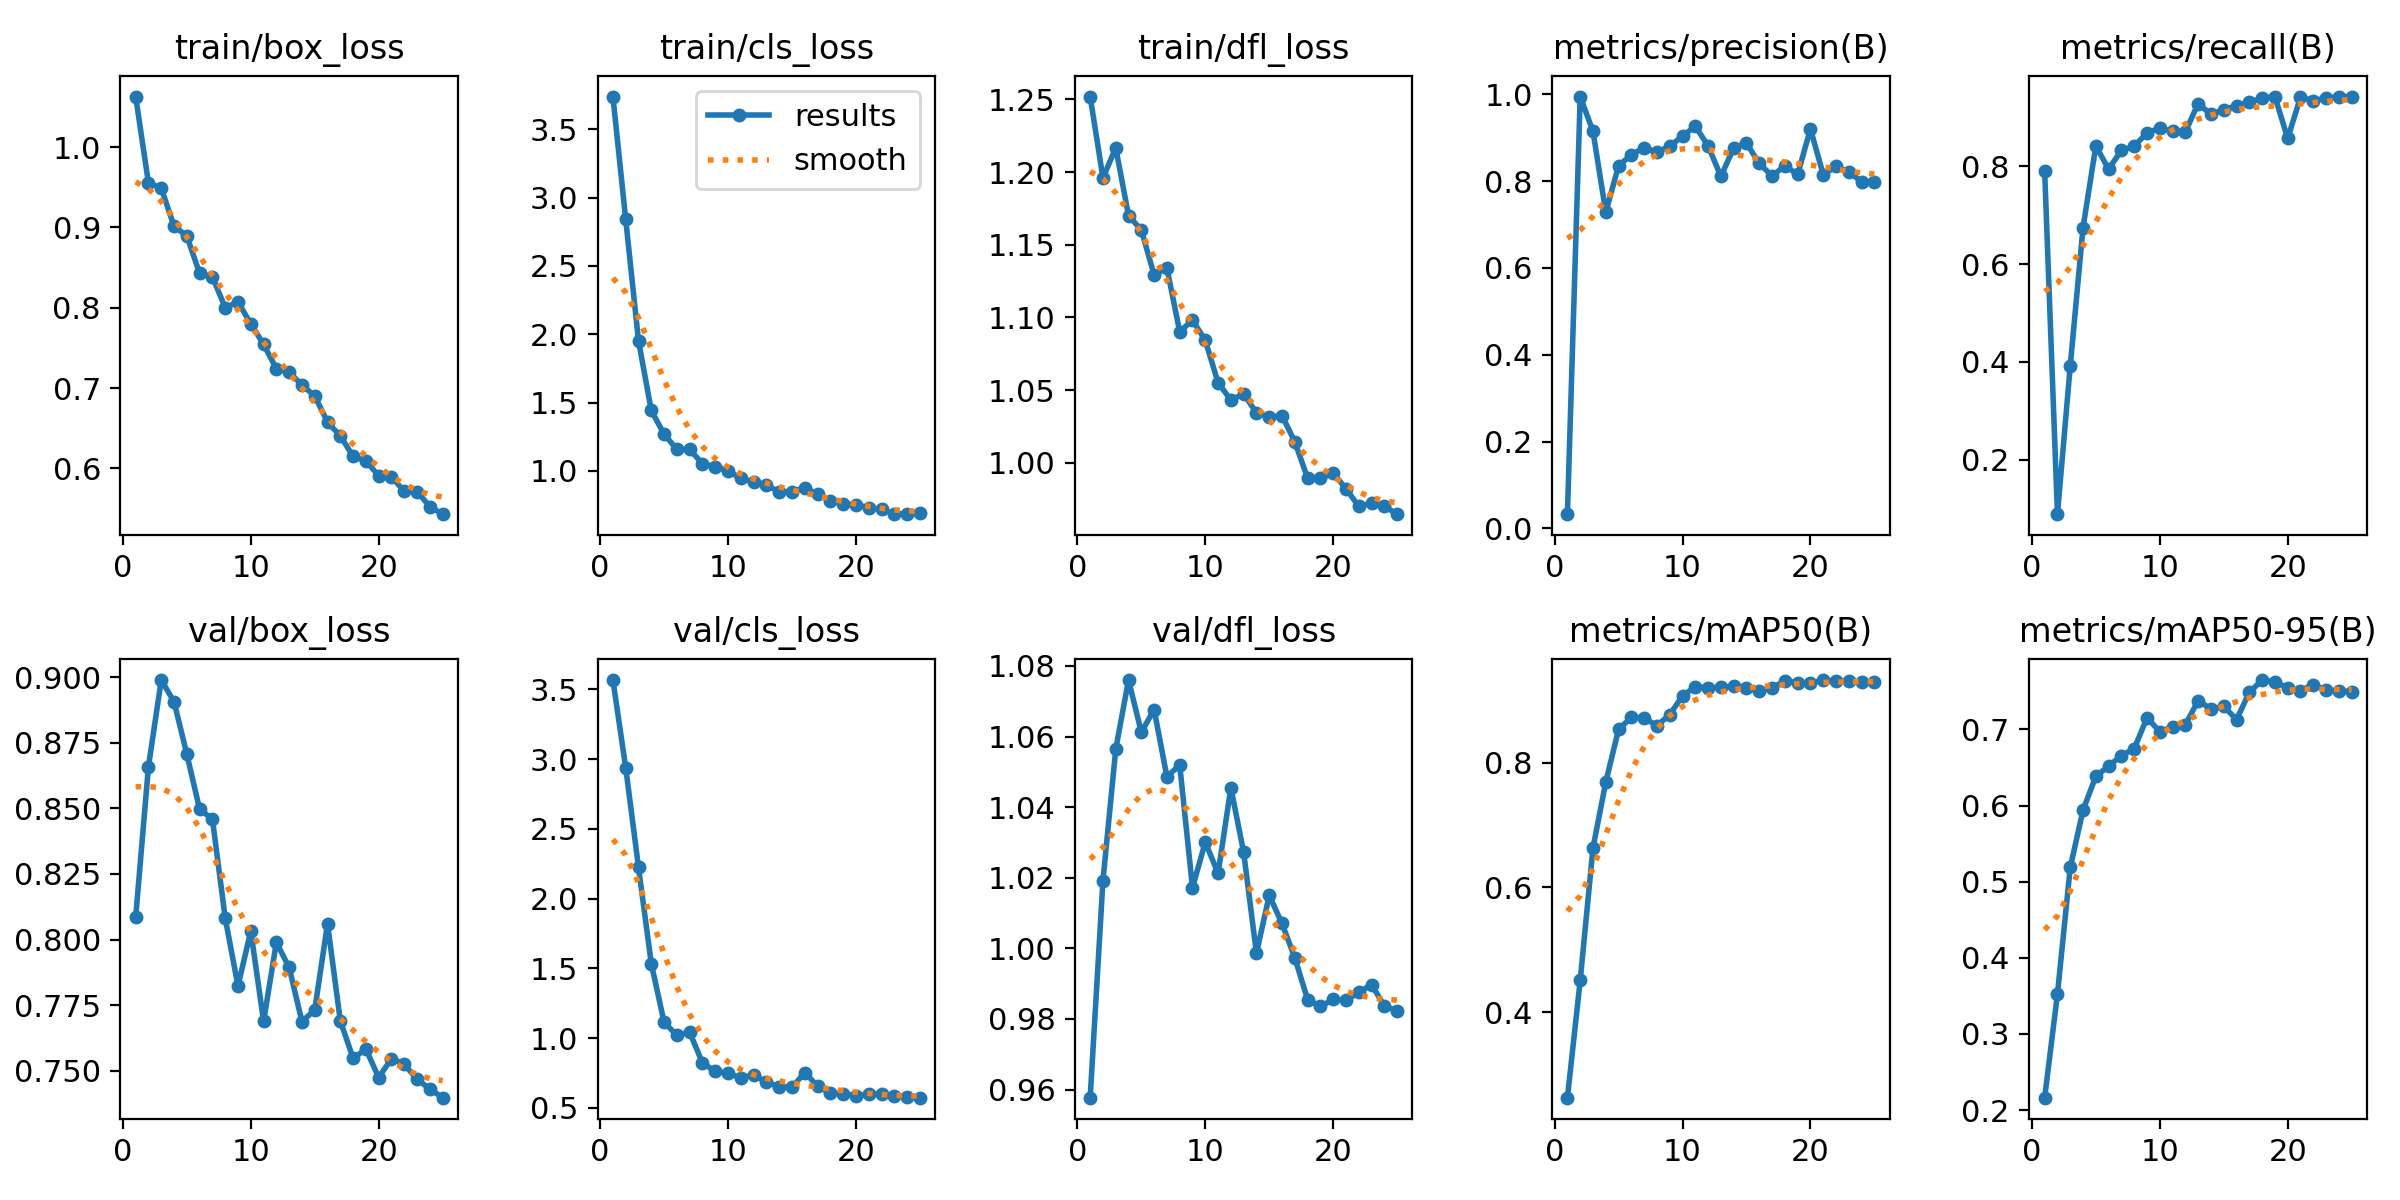

In [89]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train7/results.png', width=600)

/content


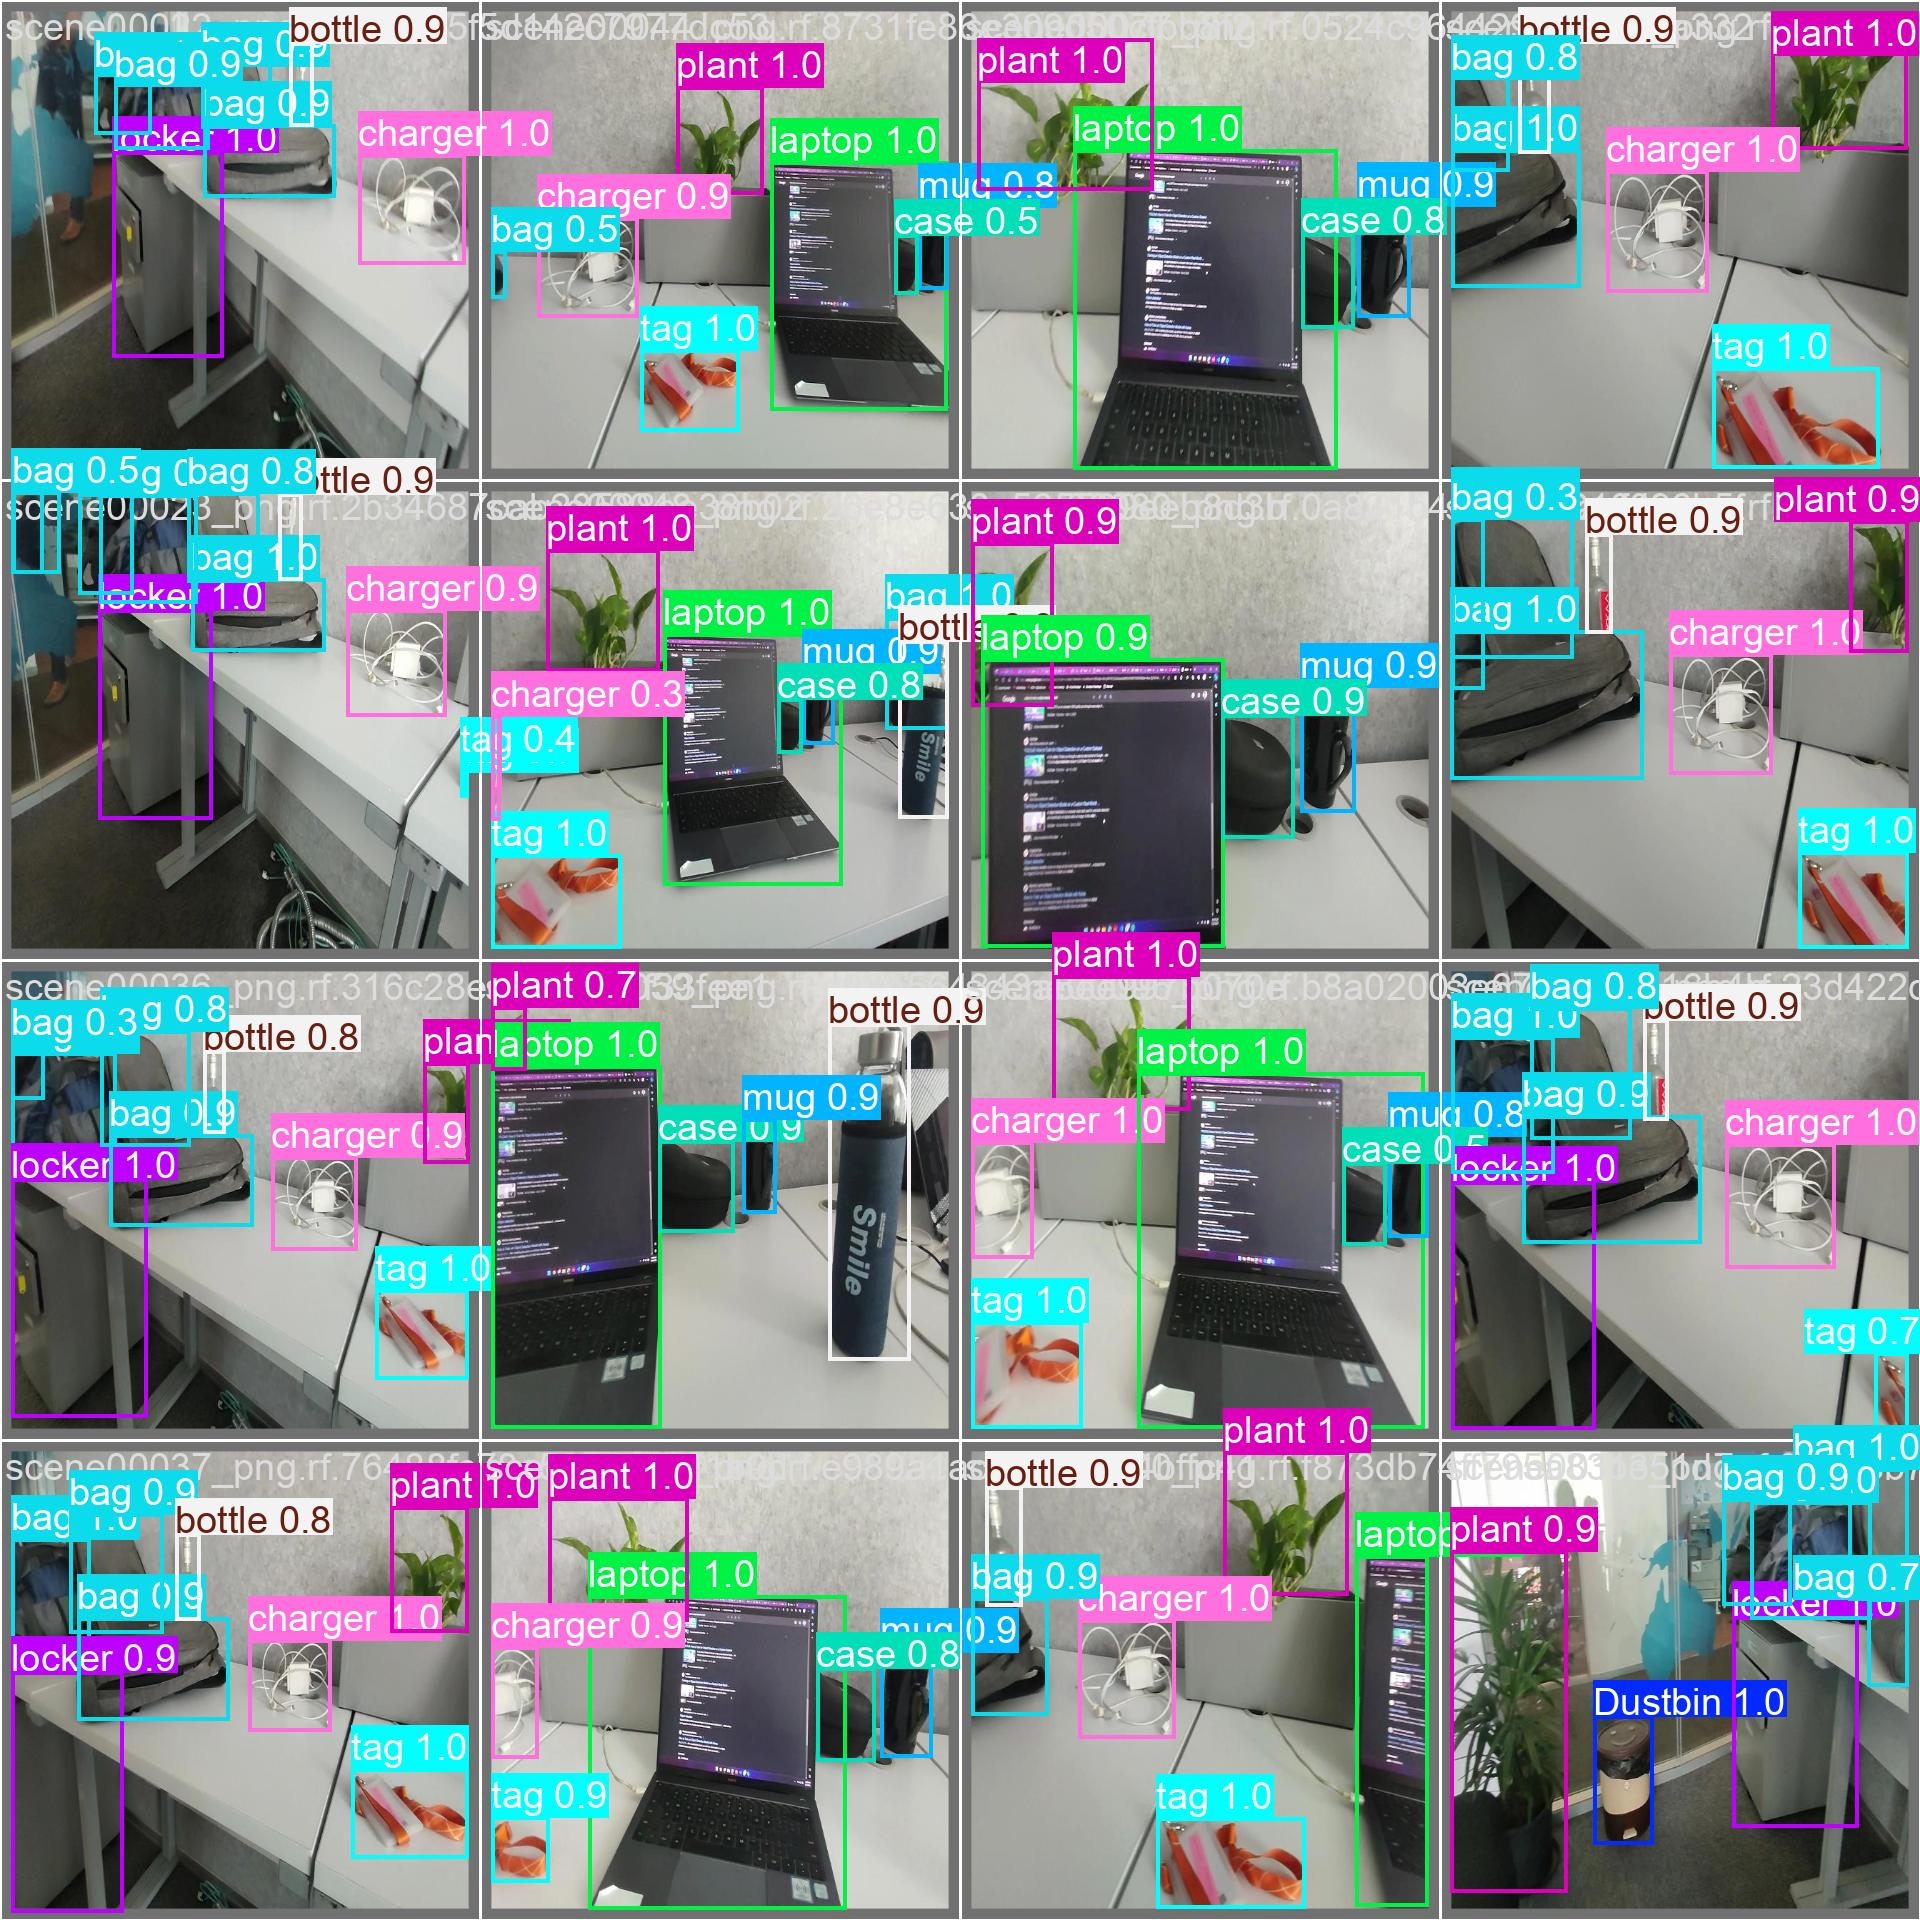

In [90]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train7/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [91]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train7/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,008,183 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/Office-Space-2/valid/labels.cache... 32 images, 0 backgrounds, 0 corrupt: 100% 32/32 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:04<00:00,  2.16s/it]
                   all         32        193      0.835       0.94      0.932      0.764
               Dustbin          5          5      0.857          1      0.995      0.881
                   bag         24         56      0.898      0.945      0.983      0.771
                bottle         24         24      0.944      0.917      0.933      0.663
                  case          9          9      0.831          1      0.929      0.639
                 chair          3          3      0.788          1      0.995       0.84
               charger         22         22 

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images

/content
Ultralytics YOLOv8.0.2 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
Model summary: 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
image 1/13 /content/football-players-detection-1/test/images/40cd38_7_6_png.rf.68ef7fcd663cdf0f5b96bacdbcd94e07.jpg: 384x640 21 players, 1 referee, 15.5ms
image 2/13 /content/football-players-detection-1/test/images/42ba34_1_5_png.rf.4337fde8fbe3640cf4351fb41ac9c3ca.jpg: 384x640 1 goalkeeper, 23 players, 1 referee, 11.6ms
image 3/13 /content/football-players-detection-1/test/images/42ba34_5_5_png.rf.ceb556bd4c92d41496ae1d8c56600c4a.jpg: 384x640 1 goalkeeper, 20 players, 1 referee, 11.6ms
image 4/13 /content/football-players-detection-1/test/images/4b770a_1_4_png.rf.5a45b3b841a06de414ceb802e34c136f.jpg: 384x640 1 goalkeeper, 20 players, 3 referees, 11.6ms
image 5/13 /content/football-players-detection-1/test/images/4b770a_3_6_png.rf.d0d9403f2f73ca0da7a6a1373c02b749.jpg: 384x640 1 goalkeeper, 20 players, 

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:1]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/1
Share your model with the world at: https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/1


## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.